In [16]:
#importing the dataset and the requiired libraries
import pandas as pd
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"
data=pd.read_csv(r"C:\Users\user\OneDrive\Desktop\datasets ds\data sets\rfm_data.csv")
data.head(5)

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [26]:
data.shape

(1000, 14)

In [27]:
#obtainig the dataset information
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [28]:
#checking for null values
data.isnull().any()

CustomerID            False
PurchaseDate          False
TransactionAmount     False
ProductInformation    False
OrderID               False
Location              False
Recency               False
Frequency             False
MonetaryValue         False
RecencyScore          False
FrequencyScore        False
MonetaryScore         False
RFM_Score             False
Value Segment         False
dtype: bool

## RFM Calculation

In [17]:
from datetime import datetime
# Convert 'PurchaseDate' to datetime
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'])
# Calculate Recency
data['Recency'] = (datetime.now().date() - data['PurchaseDate'].dt.date).dt.days


In [18]:
#frequency
frequency_data = data.groupby('CustomerID')['OrderID'].count().reset_index()
frequency_data.rename(columns={'OrderID': 'Frequency'}, inplace=True)
data = data.merge(frequency_data, on='CustomerID', how='left')
data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,181,1
1,2188,2023-04-11,463.70,Product A,176819,London,181,1
2,4608,2023-04-11,80.28,Product A,340062,New York,181,1
3,2559,2023-04-11,221.29,Product A,239145,London,181,1
4,9482,2023-04-11,739.56,Product A,194545,Paris,181,1


In [19]:
#recency
monetary_data = data.groupby('CustomerID')['TransactionAmount'].sum().reset_index()
monetary_data.rename(columns={'TransactionAmount': 'MonetaryValue'}, inplace=True)
data = data.merge(monetary_data, on='CustomerID', how='left')
data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,181,1,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,181,1,463.70
2,4608,2023-04-11,80.28,Product A,340062,New York,181,1,80.28
3,2559,2023-04-11,221.29,Product A,239145,London,181,1,221.29
4,9482,2023-04-11,739.56,Product A,194545,Paris,181,1,739.56


## RFM Score Calculation:

In [20]:
# Define scoring criteria for each RFM value
recency_scores = [5, 4, 3, 2, 1]  # Higher score for lower recency (more recent)
frequency_scores = [1, 2, 3, 4, 5]  # Higher score for higher frequency
monetary_scores = [1, 2, 3, 4, 5]  # Higher score for higher monetary value


In [21]:
data['RecencyScore'] = pd.cut(data['Recency'], bins=5, labels=recency_scores)
data['FrequencyScore'] = pd.cut(data['Frequency'], bins=5, labels=frequency_scores)
data['MonetaryScore'] = pd.cut(data['MonetaryValue'], bins=5, labels=monetary_scores)

In [22]:
# Convert RFM scores to numeric type
data['RecencyScore'] = data['RecencyScore'].astype(int)
data['FrequencyScore'] = data['FrequencyScore'].astype(int)
data['MonetaryScore'] = data['MonetaryScore'].astype(int)

## RFM value Segmentation.

In [23]:
#segment defenition
# Calculate RFM score by combining the individual scores
data['RFM_Score'] = data['RecencyScore'] + data['FrequencyScore'] + data['MonetaryScore']
data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,181,1,943.31,1,1,2,4
1,2188,2023-04-11,463.70,Product A,176819,London,181,1,463.70,1,1,1,3
2,4608,2023-04-11,80.28,Product A,340062,New York,181,1,80.28,1,1,1,3
3,2559,2023-04-11,221.29,Product A,239145,London,181,1,221.29,1,1,1,3
4,9482,2023-04-11,739.56,Product A,194545,Paris,181,1,739.56,1,1,2,4


In [24]:
#creating Rfm segments based on rfm score
segment_anotations= ['Low','Mid','High']
data['Value Segment'] = pd.qcut(data['RFM_Score'], q=3, labels=segment_anotations)
data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,181,1,943.31,1,1,2,4,Low
1,2188,2023-04-11,463.70,Product A,176819,London,181,1,463.70,1,1,1,3,Low
2,4608,2023-04-11,80.28,Product A,340062,New York,181,1,80.28,1,1,1,3,Low
3,2559,2023-04-11,221.29,Product A,239145,London,181,1,221.29,1,1,1,3,Low
4,9482,2023-04-11,739.56,Product A,194545,Paris,181,1,739.56,1,1,2,4,Low


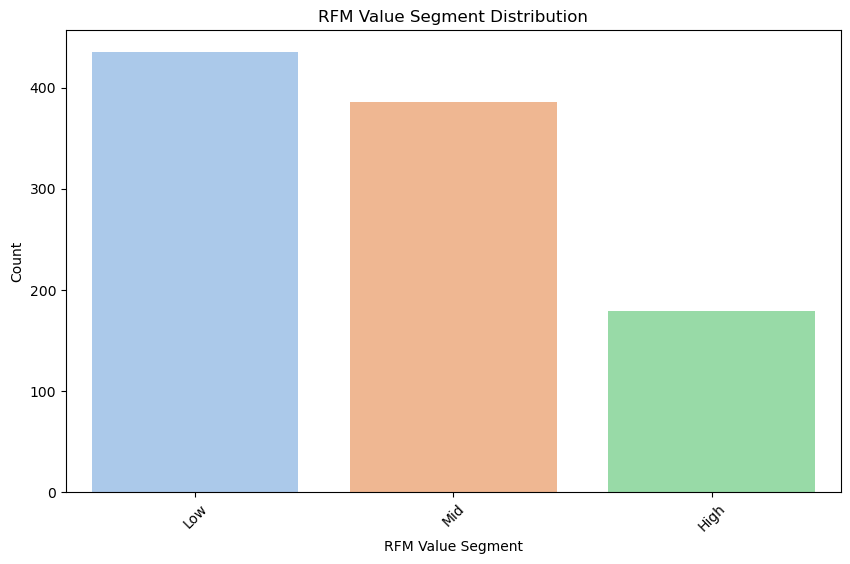

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming segment_counts is already calculated as in your code
segment_counts = data['Value Segment'].value_counts().reset_index()
segment_counts.columns = ['Value Segment', 'Count']

# Set a color palette for the plot
palette = sns.color_palette("pastel")

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Value Segment', y='Count', data=segment_counts, palette=palette)

# Set plot labels and title
plt.xlabel('RFM Value Segment')
plt.ylabel('Count')
plt.title('RFM Value Segment Distribution')

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [29]:
# Create a new column for RFM Customer Segments
data['RFM Customer Segments'] = ''

# Assign RFM segments based on the RFM score
data.loc[data['RFM_Score'] >= 9, 'RFM Customer Segments'] = 'Champions'
data.loc[(data['RFM_Score'] >= 6) & (data['RFM_Score'] < 9), 'RFM Customer Segments'] = 'Potential Loyalists'
data.loc[(data['RFM_Score'] >= 5) & (data['RFM_Score'] < 6), 'RFM Customer Segments'] = 'At Risk Customers'
data.loc[(data['RFM_Score'] >= 4) & (data['RFM_Score'] < 5), 'RFM Customer Segments'] = "Can't Lose"
data.loc[(data['RFM_Score'] >= 3) & (data['RFM_Score'] < 4), 'RFM Customer Segments'] = "Lost"

# Print the updated data with RFM segments
print(data[['CustomerID', 'RFM Customer Segments']])

     CustomerID RFM Customer Segments
0          8814            Can't Lose
1          2188                  Lost
2          4608                  Lost
3          2559                  Lost
4          9482            Can't Lose
..          ...                   ...
995        2970   Potential Loyalists
996        6669   Potential Loyalists
997        8836   Potential Loyalists
998        1440   Potential Loyalists
999        4759   Potential Loyalists

[1000 rows x 2 columns]


## RFM analysis customer segmentsby value

In [31]:
import plotly.express as px

# Assuming segment_product_counts is already defined and sorted as in the provided code

# Create a stacked bar chart
segment_product_counts = data.groupby(['Value Segment', 'RFM Customer Segments']).size().reset_index(name='Count')
fig_stacked_bar = px.bar(segment_product_counts, 
                         x='RFM Customer Segments', 
                         y='Count', 
                         color='Value Segment', 
                         title='RFM Customer Segments by Value',
                         labels={'Count': 'Number of Customers'},
                         color_discrete_sequence=px.colors.qualitative.Pastel)

fig_stacked_bar.update_layout(barmode='stack')  # Stacked bar chart

fig_stacked_bar.show()


## RFM values within the Champions segment:


In [38]:
import plotly.express as px
champions_segment = data[data['RFM Customer Segments'] == 'Champions']

fig = px.box(champions_segment, y=['RecencyScore', 'FrequencyScore', 'MonetaryScore'],
             boxmode='group', # Put boxes side by side
             labels={'variable': 'RFM Value', 'value': 'Score'},
             title='Distribution of RFM Values within Champions Segment')

# Customize the layout
fig.update_layout(yaxis_title='RFM Value')

# Show the plot
fig.show()







## Correlation of the recency, frequency, and monetary scores

In [39]:

import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Assuming you have a DataFrame called champions_segment with columns: 'RecencyScore', 'FrequencyScore', 'MonetaryScore'
# If not, replace this with your actual DataFrame
# champions_segment = pd.read_csv('your_data.csv')

# Calculate the correlation matrix
correlation_matrix = champions_segment[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].corr()

# Visualize the correlation matrix using a heatmap
fig_heatmap = go.Figure(data=go.Heatmap(
                   z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.columns,
                   colorscale='RdBu',
                   colorbar=dict(title='Correlation')))

fig_heatmap.update_layout(title='Correlation Matrix of RFM Values within Champions Segment')

fig_heatmap.show()


##  Comparison of RFM segments

In [43]:
import plotly.colors
pastel_colors = plotly.colors.qualitative.Pastel

segment_counts = data['RFM Customer Segments'].value_counts()

# Create a bar chart to compare segment counts
fig = go.Figure(data=[go.Bar(x=segment_counts.index, y=segment_counts.values,
                            marker=dict(color=pastel_colors))])

# Set the color of the Champions segment as a different color
champions_color = 'rgb(158, 202, 225)'
fig.update_traces(marker_color=[champions_color if segment == 'Champions' else pastel_colors[i]
                                for i, segment in enumerate(segment_counts.index)],
                  marker_line_color='rgb(8, 48, 107)',
                  marker_line_width=1.5, opacity=0.6)

# Update the layout
fig.update_layout(title='Comparison of RFM Segments',
                  xaxis_title='RFM Segments',
                  yaxis_title='Number of Customers',
                  showlegend=False)

fig.show()
